In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
group1 = [[0.067, 0.21], [0.092, 0.21], 
  [0.294, 0.445], [0.227, 0.521], [0.185, 0.597], 
  [0.185, 0.689], [0.235, 0.748], [0.319, 0.773], 
  [0.387, 0.739], [0.437, 0.672], [0.496, 0.739],
  [0.571, 0.773], [0.639, 0.765], [0.765, 0.924],
  [0.807, 0.933], [0.849, 0.941]]
group2 = [[0.118, 0.143], [0.118, 0.176], 
  [0.345, 0.378], [0.395, 0.319], [0.437, 0.261],
  [0.496, 0.328], [0.546, 0.395], [0.605, 0.462],
  [0.655, 0.529], [0.697, 0.597], [0.706, 0.664],
  [0.681, 0.723], [0.849, 0.798], [0.857, 0.849],
  [0.866, 0.899]]

group1 = np.stack(group1)
group2 = np.stack(group2)

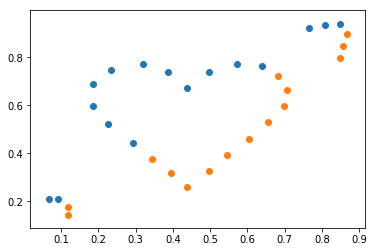

In [3]:
plt.scatter(group1[:,0],group1[:,1])
plt.scatter(group2[:,0],group2[:,1])

In [4]:
A = np.hstack((group1,np.ones((group1.shape[0],1))))
B = np.hstack((group2,np.zeros((group2.shape[0],1))))
data = np.vstack((A,B))

In [5]:
X = data[:,:2]
Y = data[:,2]
print(X.shape)

(31, 2)


[-0.01267159 -0.23208112  0.22692654]


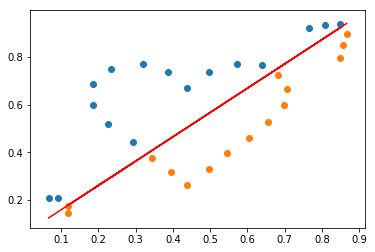

In [70]:
class Perceptron(object):
    def __init__(self, rate = 0.01, number_of_iterations = 100):
        self.rate = rate
        self.number_of_iterations = number_of_iterations

    def predict(self, X):
        a = np.dot(X, self.weight_matrix[1:]) + self.weight_matrix[0]
        #print(a.shape)
        return np.where(a >= 0.0, 1, 0)

    def fit(self, X, y):
        self.weight_matrix = np.abs(np.random.randn(1 + X.shape[1]))
        self.errors_list = []
        for _ in range(self.number_of_iterations):
            errors = 0
            for xi, target in zip(X, Y):
                update = self.rate * (target - self.predict(xi))
                self.weight_matrix[1:] += update * xi
                self.weight_matrix[0] += update
                errors += int(update != 0.0)
            self.errors_list.append(errors)
        return self
    
p = Perceptron(rate = 0.01, number_of_iterations = 1000)
p.fit(X, Y)
m = p.weight_matrix
print(m)

plt.scatter(group1[:,0],group1[:,1])
plt.scatter(group2[:,0],group2[:,1])
plt.plot(X[:,0], -(m[1]*X[:,0] + m[0])/m[2], 'r')